In [3]:
import pandas as pd
import matplotlib.pyplot as plt

topPassMatch = []
targetedPassMatch = []
crackedTop =0
topTries = 0
crackedTargeted = 0
targetedTries = 0


In [5]:
df = pd.read_csv('users.csv')
dfTop100 = pd.read_csv('passwordsList100.csv')
dfTargeted = pd.read_csv('passwordsTargeted.csv')


iterator = 1

for index, row in df.iterrows():
    iterator +=1
    #print("Entering row ", iterator, " ", row[1])
    topTries, targetedTries = 0, 0

    for index2, row2 in dfTop100.iterrows():
        topTries += 1
        if row[1] == row2[0]:
            #print("MATCH FOUND ", row[1])
            crackedTop+=1
            if ([row[1], topTries]) not in topPassMatch:
                topPassMatch.append([row[1], topTries]) 
            topTries = 0
            continue

    for index3, row3 in dfTargeted.iterrows(): # Nededs to be changed, this is for testing only, needs actual 100 passwords
        targetedTries += 1
        if row[1] == row3[0]:
            #print("MATCH FOUND ", row[1])
            crackedTargeted+=1
            if ([row[1], targetedTries]) not in targetedPassMatch:
                targetedPassMatch.append([row[1], targetedTries])
            targetedTries = 0
            continue

try:
    os.remove('topPassMatch.csv')
except:
    print("Error while deleting file ", 'topPassMatch.csv')

try:
    os.remove('targetedPassMatch.csv')
except:
    print("Error while deleting file ", 'targetedPassMatch.csv')

dfTargetedPassMatch = pd.DataFrame(targetedPassMatch, columns=['Password', 'Number of Tries'])
dfTopPassMatch = pd.DataFrame(topPassMatch, columns=['Password', 'Number of Tries'])

dfTargetedPassMatch.to_csv('targetedPassMatch.csv', index=False)
dfTopPassMatch.to_csv('topPassMatch.csv', index=False)


Error while deleting file  topPassMatch.csv
Error while deleting file  targetedPassMatch.csv


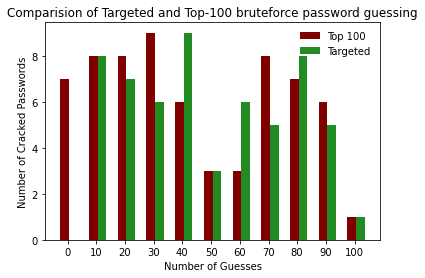

In [6]:
targPlotX = []
targPlotY = []
topPlotX = []
topPlotY = []

import numpy as np

for tries in range(11):
    count = 0
    for passwd in  targetedPassMatch:
        if passwd[1] in range(tries*10, tries*10+10):
            count += 1 # increase amount of passwd guessed for that specific number of guesses
    
    #print("Targ: ", tries*10, " ", count)
    targPlotX.append(tries*10)
    targPlotY.append(count)
    count = 0

    for passwd in topPassMatch:
        if passwd[1] in range(tries*10, tries*10+10):
            count += 1 # increase amount of passwd guessed for that specific number of guesses

    #print("Top: ", tries*10, " ", count)
    topPlotX.append(tries*10)
    topPlotY.append(count)

width = 3
plt.xlabel("Number of Guesses")
plt.ylabel("Number of Cracked Passwords")
plt.xticks(np.arange(0,101,10))
plt.yticks(np.arange(0,11,2))
plt.title("Comparision of Targeted and Top-100 bruteforce password guessing")
plt.bar(np.arange(0,101,10)-1, topPlotY, width=width, color="maroon", label="Top 100")
plt.bar(np.arange(0,101,10)+2, targPlotY, width=width, color="forestgreen", label="Targeted")
plt.legend(frameon=False)
plt.show()

#print(targPlot, '\n',topPlot)